# Student Performance Analysis

This project is an Exploratory Data Analysis (EDA) exercise centered on the factors that influence student academic performance.

The goal of this Python project is to clean the provided dataset to systematically analyze the relationships between various student attributes and their academic outcomes. The project seeks to provide a detailed, data-driven understanding of how various inputs relate to outcomes, offering actionable insights for educators and administrators.

In [80]:
# Importing essential libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Loading the dataset

In [44]:
File_path = '../Students Performance Dataset/student_performance.csv' # creating a variable for the file path

df = pd.read_csv(File_path).copy() # loading the csv file

# Analysing the data to find missing values and incorrect datatypes
df.info()

#  Any Duplicate values should be removed
#  The Column 'Study _hours' should be renamed to 'Study_hours'
#  There are 40 null values in Student_id column which should be removed before analysis
#  There are 34 null values in Student_name column which should be removed before analysis
#  The null values in the Gender, Parental_support and Online_classes_taken, etc should be filled with 'NA'
#  The null values in the all the grade columns should be filled with '0'
#  The student_id column should be converted from float to int
#  The Extracurricular_activities column should be converted from float to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_id                  960 non-null    float64
 1   Student_name                966 non-null    object 
 2   Gender                      952 non-null    object 
 3   Attendance_rate             960 non-null    float64
 4   Studyhours_per_week         950 non-null    float64
 5   Previous_grade              967 non-null    float64
 6   Extracurricular_activities  957 non-null    float64
 7   Parental_support            978 non-null    object 
 8   Final_grade                 960 non-null    float64
 9   Study _hours                976 non-null    float64
 10  Online_classes_taken        975 non-null    object 
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


### 2. Data Cleaning

In [45]:
# Checking if there are any duplicates
df_no_dup = df.drop_duplicates()

print('Total row before removing duplicates :', len(df))
print( 'Total rows after removing duplicates :', len(df_no_dup))

# No duplicates where found

Total row before removing duplicates : 1000
Total rows after removing duplicates : 1000


In [46]:
# Renaming column 'Study _hours' to 'Study_hours'
df.rename(columns = {'Study _hours' : 'Study_hours'}, inplace = True)

# Handling missing values
df_cleaned = df.dropna(subset=['Student_id', 'Student_name']).copy() # dropping nulls in Student_id & Student_name columns

# Filling the null values appropriately
df_cleaned['Gender'] = df_cleaned['Gender'].fillna('Unknown')
df_cleaned['Parental_support'] = df_cleaned['Parental_support'].fillna('NA')
df_cleaned['Online_classes_taken'] = df_cleaned['Online_classes_taken'].fillna('NA')

# Filling the grade values and attendance rates with median value

# making a list to fill the median values easily
cols_to_impute = [ 
    'Attendance_rate',
    'Studyhours_per_week',
    'Previous_grade',
    'Extracurricular_activities',
    'Final_grade',
    'Study_hours'] 

df_cleaned[cols_to_impute] = df_cleaned[cols_to_impute].fillna(df_cleaned[cols_to_impute].median())

# Every column has been filled with appropriate data for analysis

In [47]:
# Data type Conversion

df_cleaned['Student_id'] = df_cleaned['Student_id'].astype(int)
df_cleaned['Extracurricular_activities'] = df_cleaned['Extracurricular_activities'].astype(int)

### 3. Data Analysis

In [48]:
# Deep-diving into the data
df_cleaned.describe()

,Student_id,Attendance_rate,Studyhours_per_week,Previous_grade,Extracurricular_activities,Final_grade,Study_hours
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000
mean,5422.259179,85.597192,17.558315,77.753780,1.497840,80.138229,2.393089
std,2663.436456,7.140047,6.091940,9.814929,1.029036,9.333364,1.610021
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,-5.000000
25%,3119.000000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000
50%,5408.500000,88.000000,17.000000,78.000000,1.000000,80.000000,2.500000
75%,7773.750000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000
max,9998.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000


In [49]:
# Student distribution by gender
df_cleaned['Gender'].value_counts().reset_index(name = 'no_of_students')

,Gender,no_of_students
0,Male,460
1,Female,422
2,Unknown,44


In [50]:
# Median Attendance rate of students based on their gender
df_cleaned.groupby('Gender')['Attendance_rate'].median().reset_index(name = 'median_attendance_rate')

,Gender,median_attendance_rate
0,Female,88.0
1,Male,86.5
2,Unknown,89.0


#### *How many students improved their grades?*

In [51]:
# Finding the number of students who improved their grades

students_imp_mask = df_cleaned['Final_grade'] > df_cleaned['Previous_grade'] # applying a condition where the final grade is higher than previous grade

students_improved = df_cleaned[students_imp_mask] # filtering the data to only show the data of students who improved their grades
student_imp_count = students_improved['Student_id'].count() # calculating the count of students who improved their grades

print('Total number of students who Improved their grades :' , student_imp_count) # printing the number of students who improved their grades

Total number of students who Improved their grades : 521


#### *How many students have above 90% Attendance rate?*

In [52]:
#Filtering the dataframe for students who have above 90% attendance rate
above_ninety =  df_cleaned['Attendance_rate'] > 90.0

df_above_ninety = df_cleaned[above_ninety]
above_ninety_count = df_above_ninety['Student_id'].count()

print('Number of students having attendance rate greater than 90% :', above_ninety_count)

Number of students having attendance rate greater than 90% : 269


#### *Students who didn't take any extracurricular activities?*

In [60]:
#Filtering the dataframe for students who didn't take any extra curricular activities
no_extra = df_cleaned['Extracurricular_activities']== 0

df_no_extra = df_cleaned[no_extra]
no_extra_count = df_no_extra['Student_id'].count()

print("Number of students who didn't take any extra curricular activities :",no_extra_count)

Number of students who didn't take any extra curricular activities : 177


#### *How many students take online classes?*

In [141]:
class_filter = df_cleaned['Online_classes_taken'] == True

class_taken = df_cleaned[class_filter]
class_taken_count = class_taken['Student_id'].count()

print('Number of students who take online classes :', class_taken_count)

Number of students who take online classes : 453


#### *Distribution of Student Parental Support Levels*

Text(0, 0.5, 'Student Count')

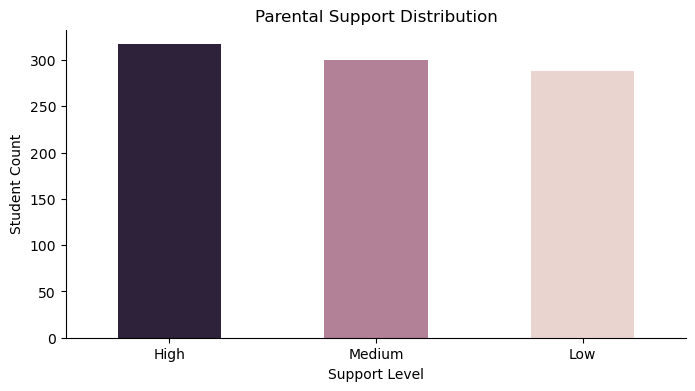

In [102]:
# Filtering the data to get the data of students who has High, Medium and Low Parental support
support_level = ['High','Medium','Low']

df_parent = df_cleaned[df_cleaned['Parental_support'].isin(support_level)]
df_parent_dist = df_parent['Parental_support'].value_counts().reset_index(name = 'count')

# Plotting a barplot using seaborn
plt.figure(figsize = (8,4))
sns.barplot(data = df_parent_dist, x = 'Parental_support', y = 'count', hue = 'count', width = 0.5, legend = False)
sns.despine()
plt.title('Parental Support Distribution')
plt.xlabel('Support Level')
plt.ylabel('Student Count')